## Model Evaluation and Refinement

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as skl
import seaborn as sb
import skillsnetwork
import warnings
warnings.filterwarnings('ignore')

In [2]:
await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv','module_5_auto.csv')

Saved as 'module_5_auto.csv'


In [3]:
df = pd.read_csv('module_5_auto.csv',header=0)
df.head(5)

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


First, let's use only numeric data

In [4]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Now let's remove the first two columns, 'Unnamed:0.1' and 'Unnamed:0', as they do not provide any value.

In [5]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace=True) 

In [6]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Let's import some libraries for plotting:

In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual

Defining our plotting functions:

In [8]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sb.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sb.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [9]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    # training data 
    # testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## 1. Training and Testing

Separating our target from our possible predictors.

In [10]:
# target: price
y_data = df['price']

In [11]:
# everything else
x_data = df.drop('price', axis=1)

Randomly spliting our data into training and testing sets.

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size=0.10,
                                                    random_state=1)
# testing set = 10% of total data set
print('# of test samples: ',x_test.shape[0])
print('# of training samples: ',x_train.shape[0])

# of test samples:  21
# of training samples:  180


What if we wanted our testing set to be 40% of the total dataset?

In [13]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data,
                                                        y_data,
                                                        test_size=0.4,
                                                        random_state=1)
# testing set = 40% of total data set
print('# of test samples: ',x_test1.shape[0])
print('# of training samples: ',x_train1.shape[0])

# of test samples:  81
# of training samples:  120


Now let's work on our model (using our 10% split)

In [14]:
from sklearn.linear_model import LinearRegression

Training our model using 'horsepower'

In [15]:
lr = LinearRegression()
lr.fit(x_train[['horsepower']], y_train)

LinearRegression()

Calculating R^2 from test data:


In [16]:
lr.score(x_test[['horsepower']], y_test)

0.36358755750788274

Calculatin R^2 from training data:

In [17]:
lr.score(x_train[['horsepower']], y_train)

0.6619724197515104

We can see that R-Squared is much smaller using our test data than when using our training data. 

Meaning the model performs better on our training data compared to our testing data.

At times, we may not have enough testing data, as a result we may want to perform cross-validation.

### Cross-Validation Score

There are several different ways to perform cross-validation.

Here we will be using the cross_val_score method from Scikit-Learn's model_selection module, it's default scoring method is R-Squared.

It intakes: our model, the feature, the target data, and how many folds we would like.

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
r_cross = cross_val_score(lr,
                          x_data[['horsepower']],
                          y_data,
                         cv=4)
# cv = num of folds

Let's look at the average and standard deviation of our estimate.

In [20]:
print("Mean of folds: ",r_cross.mean()," SD of folds:",r_cross.std())

Mean of folds:  0.5220099150421195  SD of folds: 0.2911839444756025


We can also use Negative Squared Error as a score.

In [21]:
-1 * cross_val_score(lr,
                    x_data[['horsepower']],
                    y_data,
                    cv=4,
                    scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014929,
       17561927.72247588])

Now what if we wanted the average R-Squared but when only using two folds?

In [22]:
r_cross1 = cross_val_score(lr,
                          x_data[['horsepower']],
                          y_data,
                          cv=2)

In [23]:
print('Avg R^2 of folds: ',r_cross1.mean())

Avg R^2 of folds:  0.5166761697127429


We can also use Cross-Validation to predict outputs, using the cross_val_predict method.

In [24]:
from sklearn.model_selection import cross_val_predict

In [25]:
yhat = cross_val_predict(lr,
                         x_data[['horsepower']],
                         y_data,
                         cv=4)
yhat[0:3]

array([14141.63807508, 14141.63807508, 20814.29423473])

## 2. Overfitting, Underfitting and Model Selection

Why does our model perform better with our training data?
</br>One reason for this is __overfitting__.</br>
Overfitting occurs when the model fits the __noise__, but not the __underlying process__.

It turns out, our testing(out-of-sample) data  is a better measurement of how our model would perform in the real world.

These differences are even more apparent in Multiple Linear Regression and Polynomial Regression.

Let's create an MLR model.

In [26]:
mlr = LinearRegression()
mlr.fit(x_train[['horsepower', 'curb-weight', 'engine-size',
                'highway-mpg']], y_train)

LinearRegression()

Getting a prediction using __training data__.

In [27]:
yhat_train_mlr = mlr.predict(x_train[['horsepower', 'curb-weight', 'engine-size',
                'highway-mpg']])
yhat_train_mlr[0:3]

array([ 7426.6731551 , 28323.75090803, 14213.38819709])

Getting a prediction using __testing data__.

In [28]:
yhat_test_mlr = mlr.predict(x_test[['horsepower', 'curb-weight', 'engine-size',
                'highway-mpg']])
yhat_test_mlr[0:3]

array([11349.35089149,  5884.11059106, 11208.6928275 ])

#### Model Evaluation: Training Data and Testing Data

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

First, we'll visually evaluate our model using our training data.

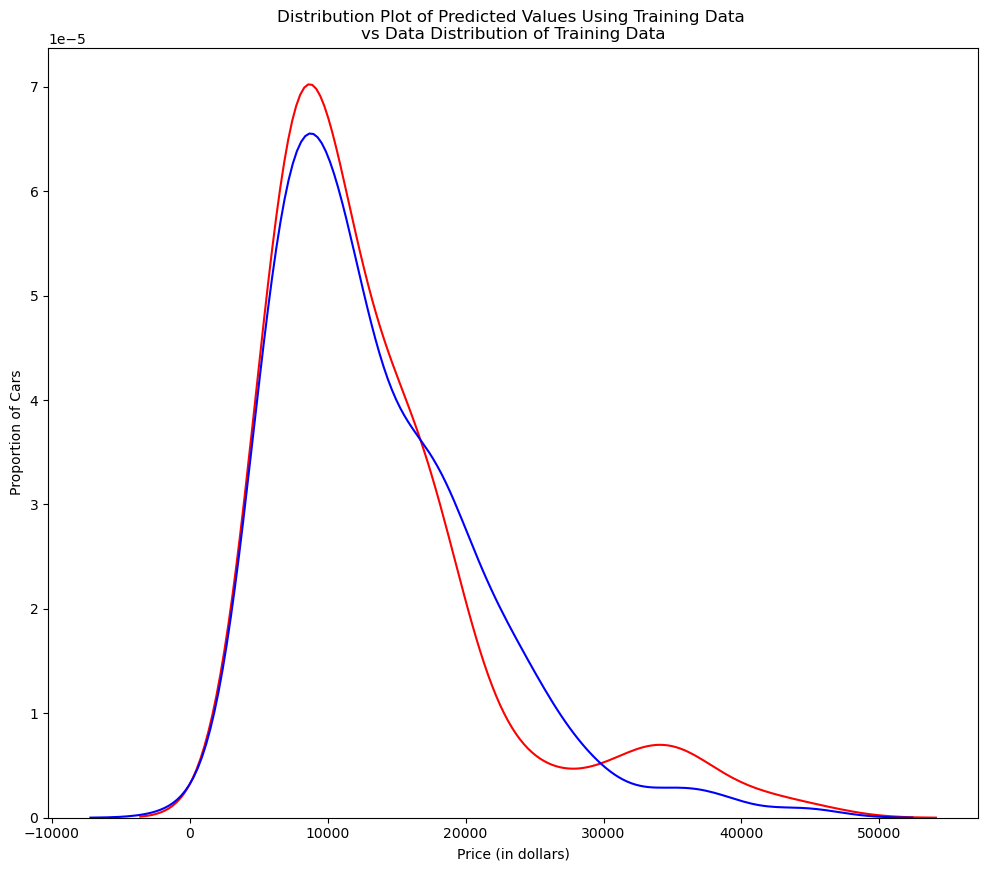

In [30]:
Title = '''Distribution Plot of Predicted Values Using Training Data 
vs Data Distribution of Training Data'''
DistributionPlot(y_train, yhat_train_mlr,
                'Actual Values (Train)',
                'Predicted Values (Train)', Title)

The model appears to be doing well in learning from our training dataset.

What happens when the model encounters new data?

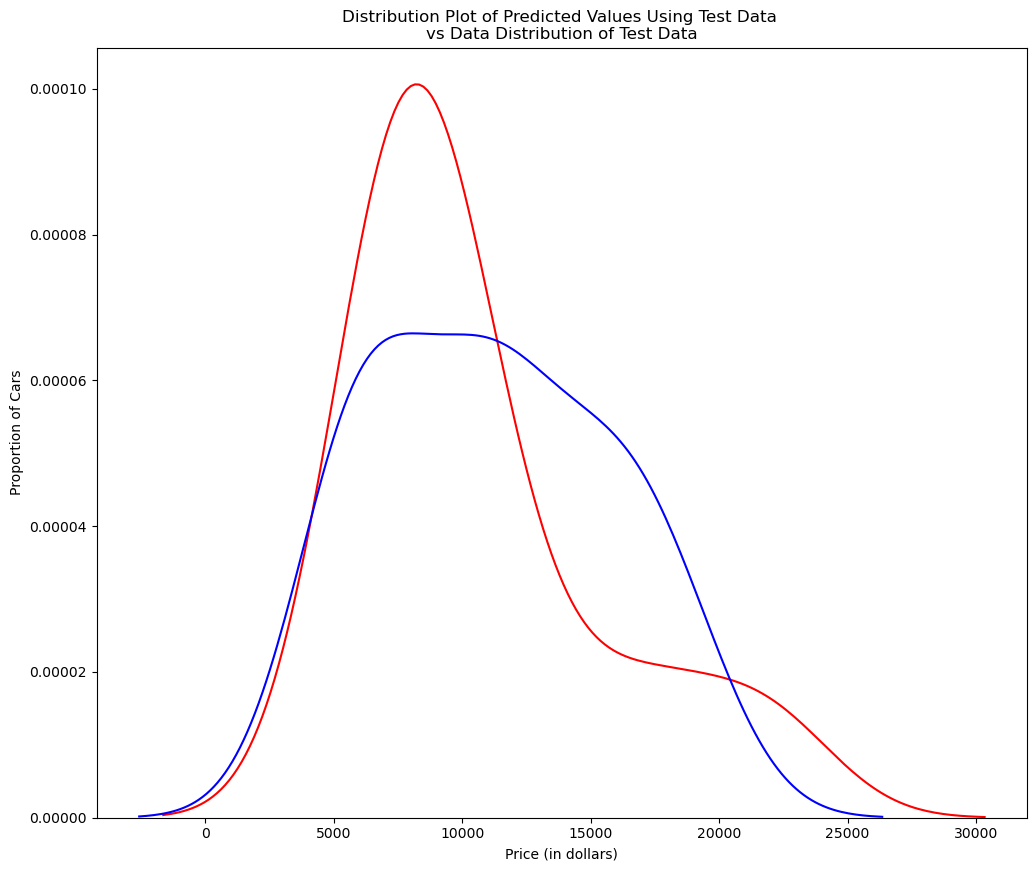

In [31]:
Title = '''Distribution Plot of Predicted Values Using Test Data 
vs Data Distribution of Test Data'''
DistributionPlot(y_test, yhat_test_mlr,
                'Actual Values (Test)',
                'Predicted Values (Test)', Title)

Comparing both plots, it's clear that the distribution is a much better fit when using our training data. It's specially evident in the 5,000 to 15,000 range.

When testing our model using the test set, the model does not perform as well since __it is modelling noise__ from our training set, but __not the underlying process__ that generated the relationship.

#### Polynomial Regression also exhibits a drop in the prediction accuracy when analysing the test data.

In [32]:
from sklearn.preprocessing import PolynomialFeatures

Creating a degree 5 polynomial model, using a 55/45 split on the data for training and testing.

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x_data,
                                                y_data,
                                                test_size=0.45,
                                                random_state=0)

In [34]:
pr = PolynomialFeatures(degree=5)

Performing a degree 5 polynomial transformation on the feature '__horsepower__'.

In [35]:
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Creating linear regression model with our polynomial features.

In [36]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

Examining output of model with prediction.

In [37]:
yhat = poly.predict(x_test_pr)
yhat[0:3]

array([ 6728.7502107 ,  7308.07521287, 12213.82613256])

Comparing our predicted values to actual targets.

In [38]:
print('Predicted values: ', yhat[0:3])
print('True values', y_test[0:3].values)

Predicted values:  [ 6728.7502107   7308.07521287 12213.82613256]
True values [ 6295. 10698. 13860.]


Plotting our model, training data, and testing data.

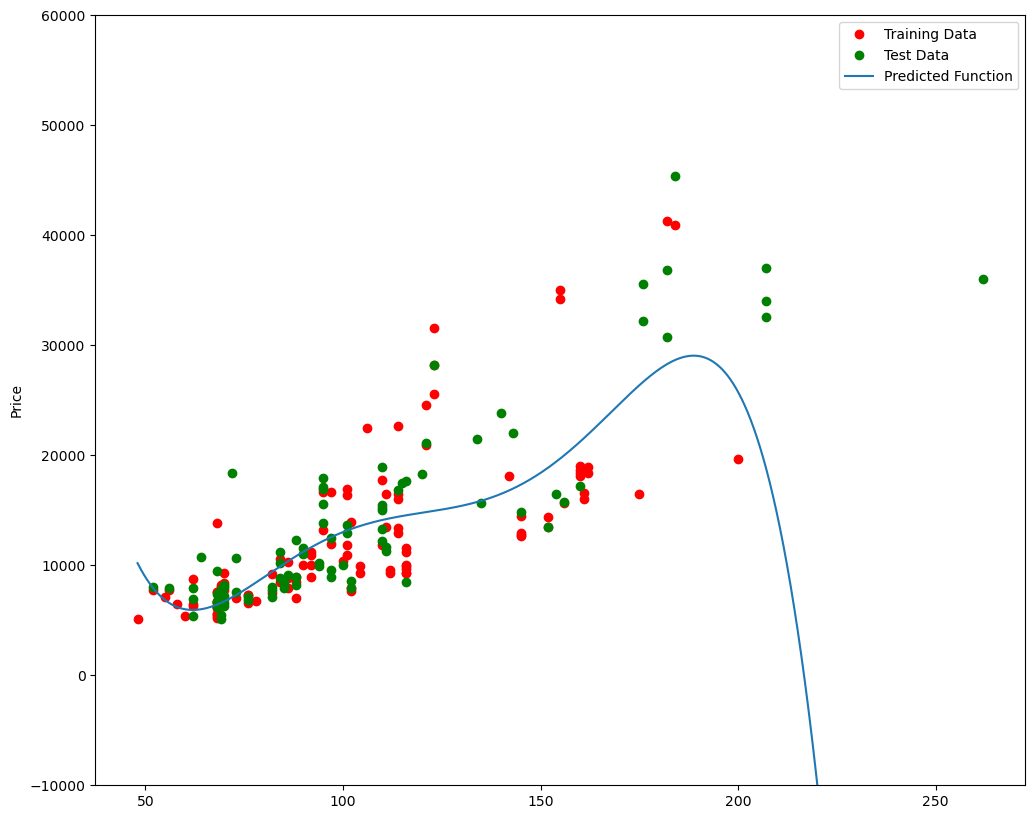

In [39]:
PollyPlot(x_train['horsepower'],x_test['horsepower'],
         y_train, y_test, poly, pr)

Our model does well in tracking the data up until about 200 horsepower, then we see the function begin to steeply diverge.

Let's look at numerical evaluations of this model.

In [40]:
print('R-Squared w/ training data:',
     poly.score(x_train_pr,y_train))

R-Squared w/ training data: 0.5567716901486396


In [41]:
print('R-Squared w/ testing data:',
     poly.score(x_test_pr,y_test))

R-Squared w/ testing data: -29.871647960628927


We know that the lowet the R-Squared, the worse the model.</br>
Clearly, our performance took a steep dive when encountering our test data. More so, a negative R-Squared is a sign of... __overfitting__!

#### How will R-Squared change on the test data for different order polynomials?

Text(3, 0.75, 'Maximum R^2 ')

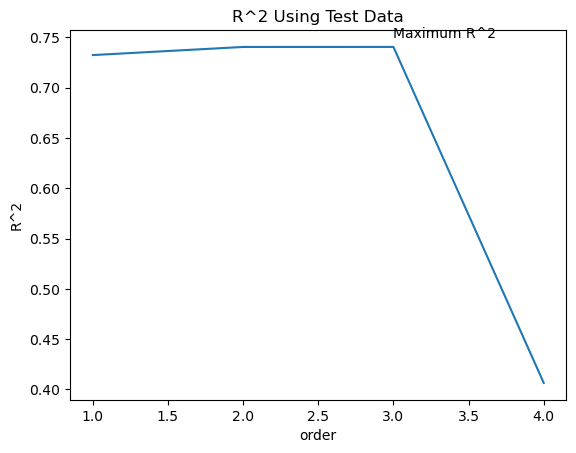

In [42]:
r_sq_test = []
order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    lr.fit(x_train_pr, y_train)
    
    r_sq_test.append(lr.score(x_test_pr,y_test))

plt.plot(order, r_sq_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

R-Squared gradually increases until we use the 3rd order polynomial, then the R-Squared dramatically decreases for the 4th order polynomial.

The following function will be used shortly.

In [43]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

The following interface allows you to experiment with different polynomial orders and different amounts of data.

In [44]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

##### Let's try a polynomial with multiple features.

Creating our PolynomialFeatures object of 2nd degree.

In [45]:
pr1 = PolynomialFeatures(degree=2)

Transforming our training and testing features.

In [46]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower',
                                  'curb-weight',
                                  'engine-size',
                                  'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower',
                                  'curb-weight',
                                  'engine-size',
                                  'highway-mpg']])

In [47]:
x_train_pr1.shape

(110, 15)

We now have 15 features.

Creating and training our linear regression model.

In [48]:
poly1 = LinearRegression().fit(x_train_pr1, y_train)

Predicting and visualizing distribution of prediction test output vs. actual test data. 

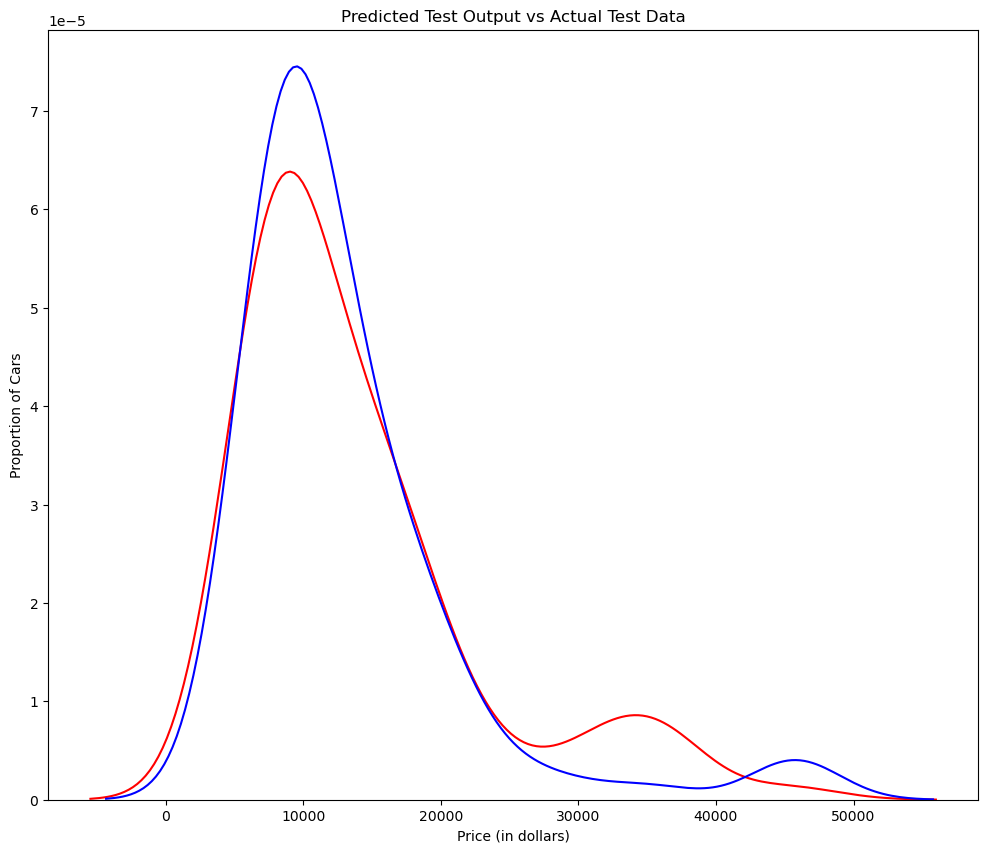

In [49]:
yhat_pr1 = poly1.predict(x_test_pr1)
title = 'Predicted Test Output vs Actual Test Data'
DistributionPlot(y_test, yhat_pr1, 'Actual Values (Test)',
                'Predicted Values (Test)', title)

Our new mulitple feature polynomial model is fairly accurate at fitting the test data.</br> However, there is some defficiency in the range of about 5,000 to 15,000 and again approximately from 30,000 to 50,000.

## 3. Ridge Regression

#### How does alpha change our model?

__note:__ Here our test data will be used as validation data.

Performing a 2nd degree polynomial transformation on our data.

In [50]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [51]:
from sklearn.linear_model import Ridge

Creating Ridge regression object with alpha(regularization parameter) set to 0.1

In [52]:
ridge_model = Ridge(alpha=1)

Training our model

In [53]:
ridge_model.fit(x_train_pr, y_train)

Ridge(alpha=1)

Predicting with our model

In [54]:
yhat = ridge_model.predict(x_test_pr)

In [55]:
print('predicted: ', yhat[0:3])
print('test set: ', y_test[0:3].values)

predicted:  [ 6570.82441941  9636.24891471 20949.92322737]
test set:  [ 6295. 10698. 13860.]


We want to select the alpha value that minimizes the test error.</br>
We can use a loop to iterate through and evaluate the best one.

In [58]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:00<00:00, 1132.94it/s, Test Score=0.564, Train Score=0.859]


Plotting out the value for R-Squared at different alphas:

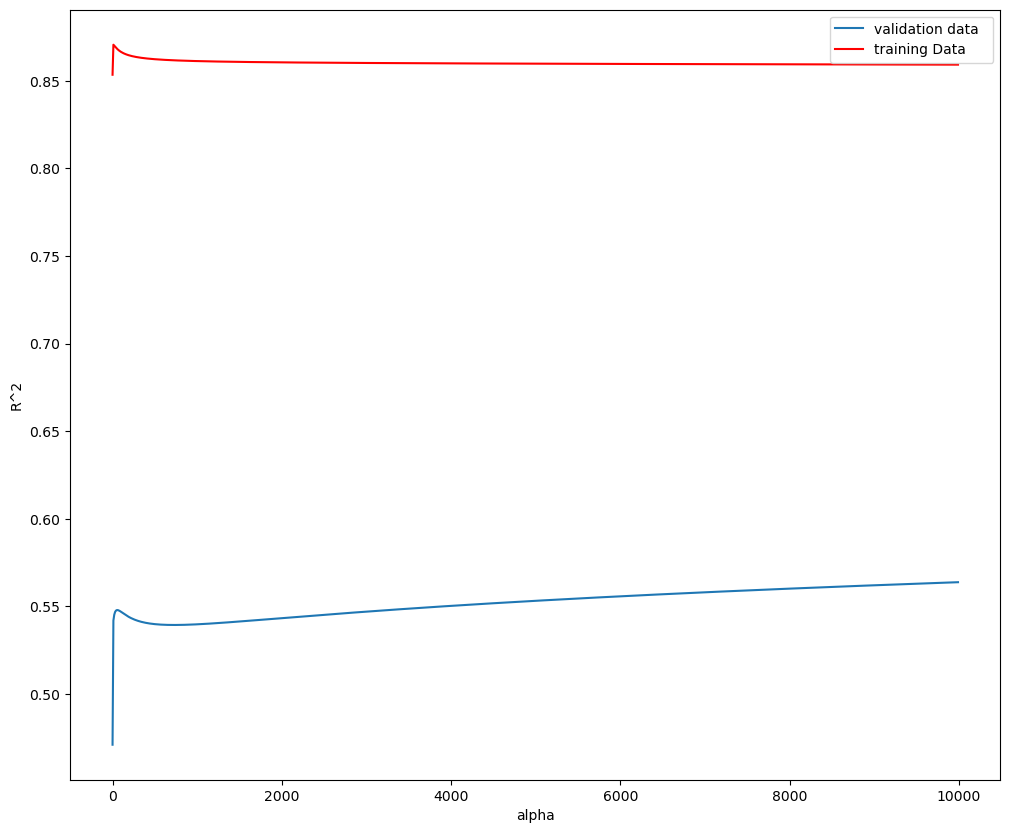

In [59]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

On our red line (training data), we see that as alpha increases, the R^2 decreases. Meaning as alpha is increased, out model performs worse over time. Conversely, as alpha increases our blue line (validation data) performs better until convering at a point.

## 4. Grid Search

Alpha, is a hyperparameter. We can make the process of finding the best hyperparameter much simpler by using __Sklearn's GridSearchCV__ module.

In [60]:
from sklearn.model_selection import GridSearchCV

Creating list with dictionary of parameter values:

In [65]:
params = [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
params

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Creating Ridge Regression object:

In [66]:
rr = Ridge()
rr

Ridge()

Creating a ridge grid search object:

In [67]:
# cv = folds
grid = GridSearchCV(rr, params, cv=4)

Training model:

In [69]:
grid.fit(x_data[['horsepower', 'curb-weight', 'engine-size',
                'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

Grid object finds the best parameter values on the validation data, we can obtain the estimator with the best parameter:

In [72]:
bestrr = grid.best_estimator_
bestrr

Ridge(alpha=10000)

Now let's test out model on the test data:

In [74]:
bestrr.score(x_test[['horsepower','curb-weight','engine-size',
                     'highway-mpg']], y_test)

0.8411649831036151

That's a pretty good R^2.